In [269]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Load Dataset


In [270]:
df = pd.read_csv('summer.csv')

In [271]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [273]:
df.shape

(31165, 9)

In [274]:
df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [275]:
df.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [276]:
df["Country"].value_counts()

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
       ... 
CIV       1
BDI       1
SEN       1
DJI       1
GAB       1
Name: count, Length: 147, dtype: int64

### Data Preprocessing

In [277]:
missing_values = df.isnull().sum()
missing_values

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [278]:
# 'Country' sütunundaki eksik değerlere sahip satırları seçin
missing_country_rows = df[df['Country'].isnull()]

print("Eksik Country Değerine Sahip Satırlar:")
missing_country_rows

Eksik Country Değerine Sahip Satırlar:


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [279]:
# Eksik değere sahip olan satırlar silindi.
df = df.dropna(subset=['Country'])

In [280]:
missing_values = df.isnull().sum()
missing_values

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [281]:
categories=pd.Categorical(df['Medal'],categories=['Bronze','Silver','Gold'],ordered=True)
print(categories)

['Gold', 'Silver', 'Bronze', 'Gold', 'Silver', ..., 'Bronze', 'Gold', 'Silver', 'Bronze', 'Bronze']
Length: 31161
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']


In [282]:
Medal,unique=pd.factorize(categories,sort=True)
df['Medal']=Medal

In [283]:
label_encoder = LabelEncoder()
df['Gender_Encoded']= label_encoder.fit_transform(df['Gender'])
df["Gender_Encoded"]

0        0
1        0
2        0
3        0
4        0
        ..
31160    0
31161    0
31162    0
31163    0
31164    0
Name: Gender_Encoded, Length: 31161, dtype: int32

In [284]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Gender_Encoded
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,2,0
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,1,0
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,0,0
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,2,0
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,1,0


### Data Visualization

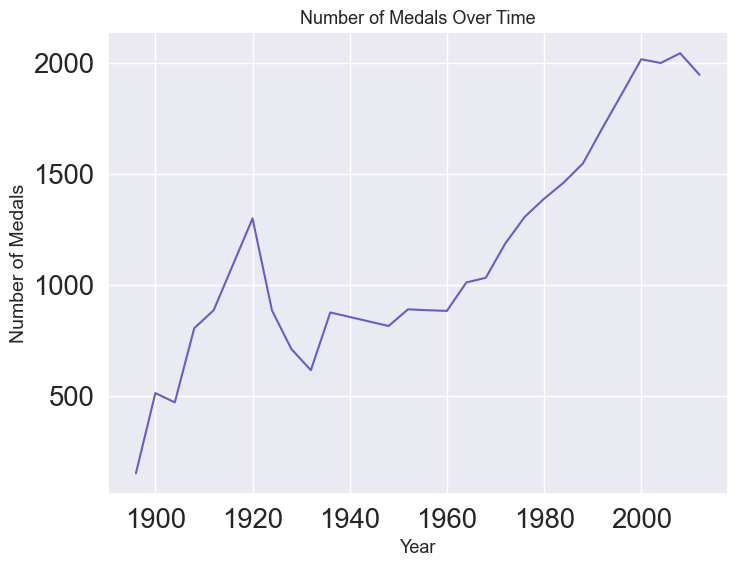

In [285]:
medal_counts = df.groupby('Year')['Medal'].count().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(x='Year', y='Medal', data=medal_counts, color='SlateBlue')
plt.title("Number of Medals Over Time", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Number of Medals", fontsize=14)
plt.show()

In [286]:
df.Country.value_counts()

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
       ... 
CIV       1
BDI       1
SEN       1
DJI       1
GAB       1
Name: count, Length: 147, dtype: int64

In [287]:
top10 = df['Country'].value_counts().head(10)
top10_gold_counts = df[df['Medal'] == 2]['Country'].value_counts().head(10)
top10_silver_counts = df[df['Medal'] == 1]['Country'].value_counts().head(10)
top10_bronze_counts = df[df['Medal'] == 0]['Country'].value_counts().head(10)


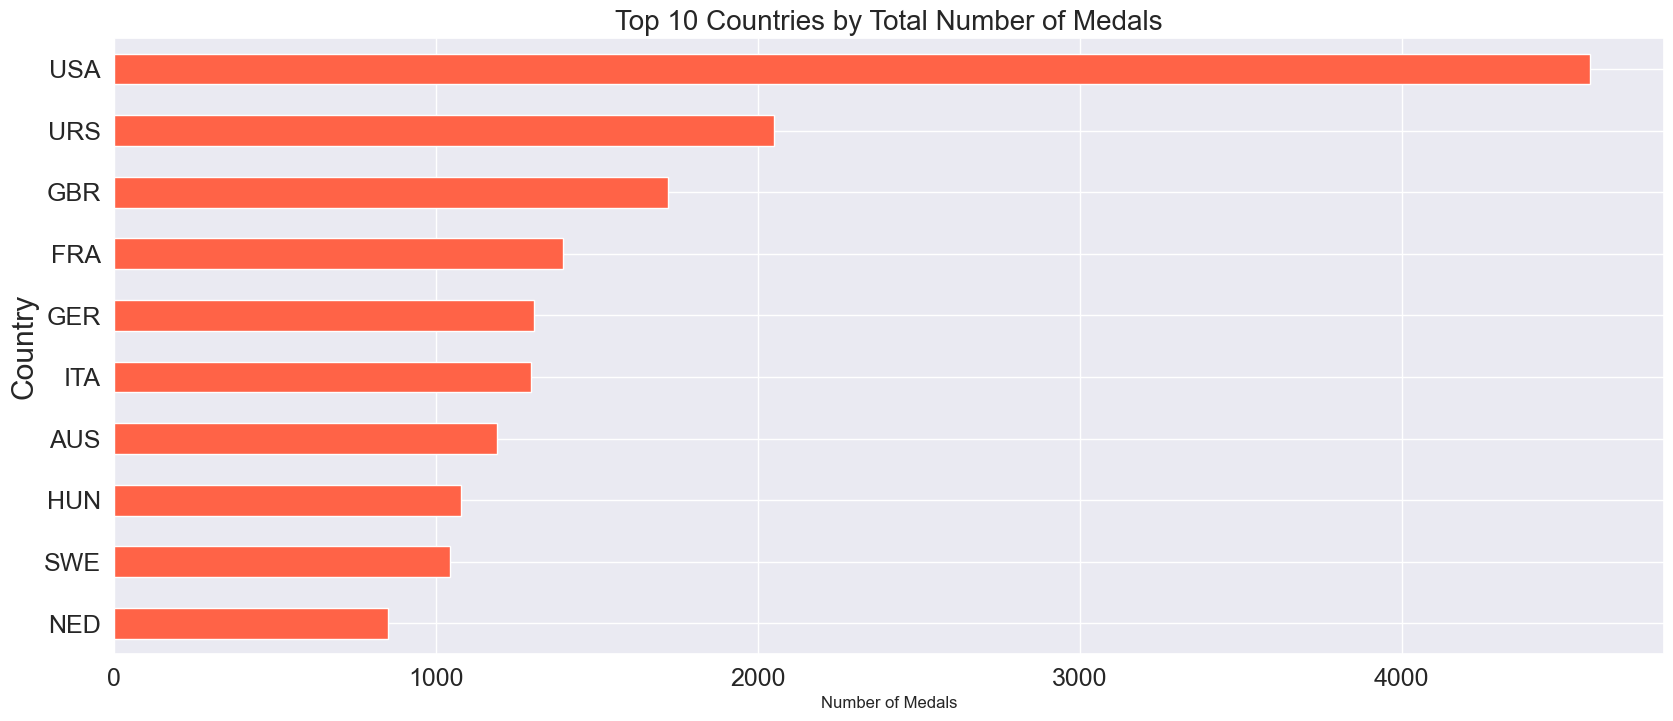

In [288]:
#Top 10 Countries by Total Number of Medals
top10.plot(kind="barh", figsize = (20, 8), fontsize = 18, color= 'Tomato')
plt.title("Top 10 Countries by Total Number of Medals", fontsize = 20)
plt.xlabel("Number of Medals", fontsize = 12)
plt.gca().invert_yaxis()
plt.show()

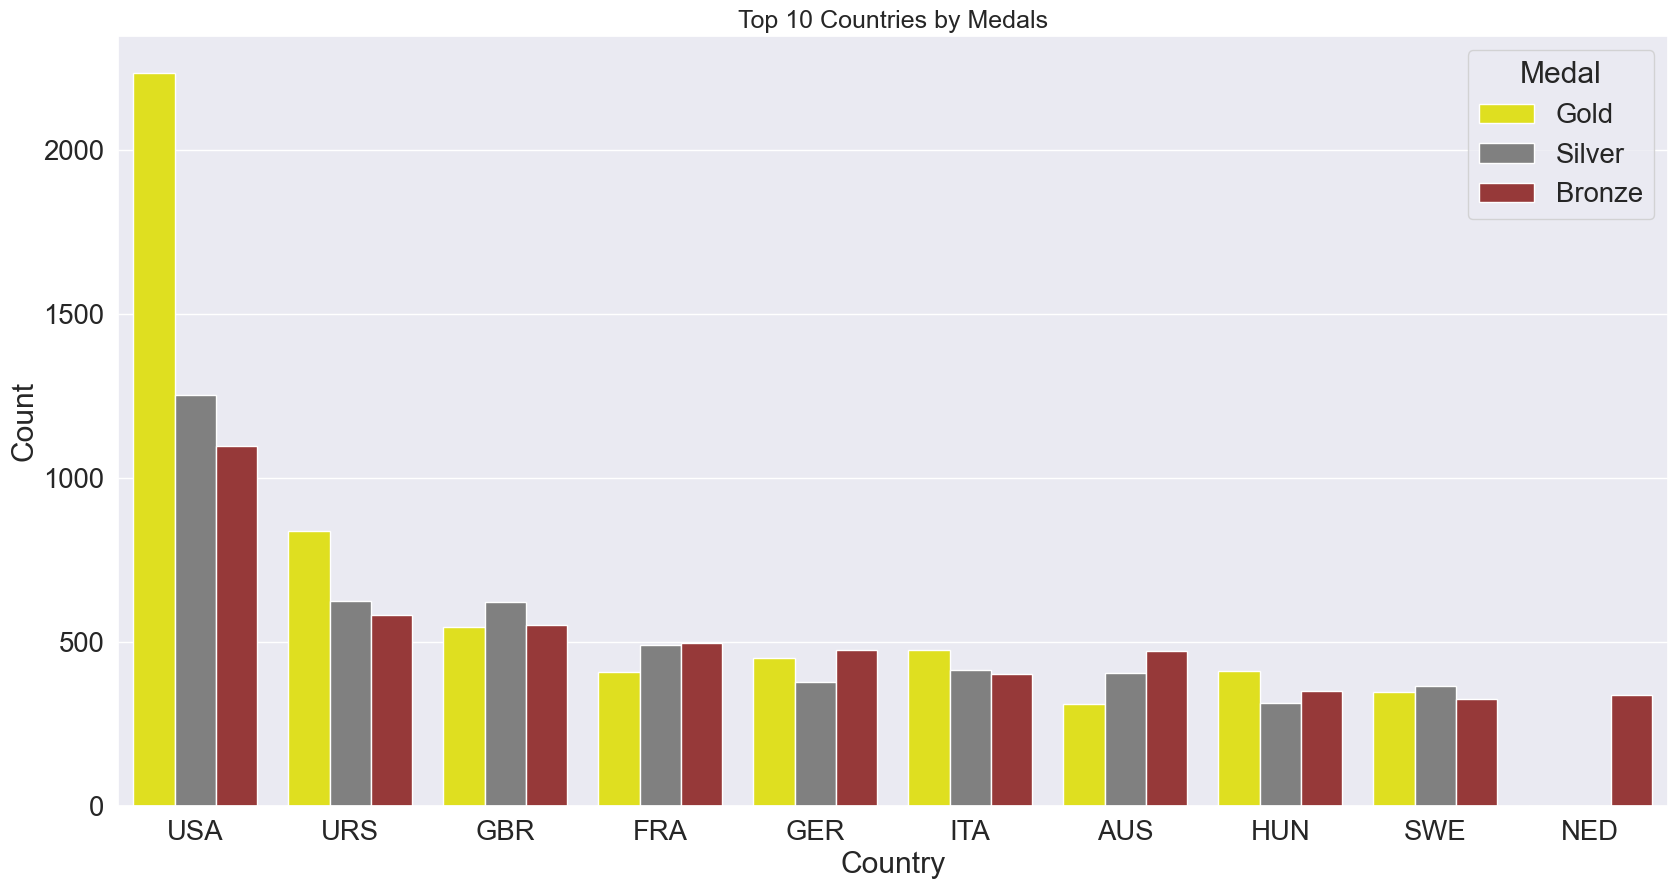

In [289]:
#Top 10 Countries by Medals
top10_df = pd.DataFrame({
    'Country': top10.index,
    'Gold': top10_gold_counts.reindex(top10.index, fill_value=0),
    'Silver': top10_silver_counts.reindex(top10.index, fill_value=0),
    'Bronze': top10_bronze_counts.reindex(top10.index, fill_value=0)
})
top10_df_melted = top10_df.melt('Country', var_name='Medal', value_name='Count')

plt.figure(figsize=(20, 10))
sns.set(font_scale=1.8)
sns.barplot(data=top10_df_melted, x='Country', y='Count', hue='Medal', order=top10_df['Country'],
            palette={"Gold": "yellow", "Silver": "grey", "Bronze": "brown"})
plt.title("Top 10 Countries by Medals", fontsize=18)
plt.show()

In [290]:
gender_counts = df['Gender'].value_counts()
print("Number of female athletes:", gender_counts['Women'])
print("Number of male athletes:", gender_counts['Men'])

Number of female athletes: 8417
Number of male athletes: 22744


In [291]:
gender_gold_counts = df[df['Medal'] == 2 ]['Gender'].value_counts()
gender_silver_counts = df[df['Medal'] == 1 ]['Gender'].value_counts()
gender_bronze_counts = df[df['Medal'] == 0 ]['Gender'].value_counts()
print("Number of Gold Medals by Women:", gender_gold_counts['Women'])
print("Number of Gold Medals by Men:", gender_gold_counts['Men'])
print("Number of Silver Medals by Women:", gender_silver_counts['Women'])
print("Number of Silver Medals by Men:", gender_silver_counts['Men'])
print("Number of Bronze Medals by Women:", gender_bronze_counts['Women'])
print("Number of Bronze Medals by Men:", gender_bronze_counts['Men'])

Number of Gold Medals by Women: 2786
Number of Gold Medals by Men: 7698
Number of Silver Medals by Women: 2801
Number of Silver Medals by Men: 7507
Number of Bronze Medals by Women: 2830
Number of Bronze Medals by Men: 7539


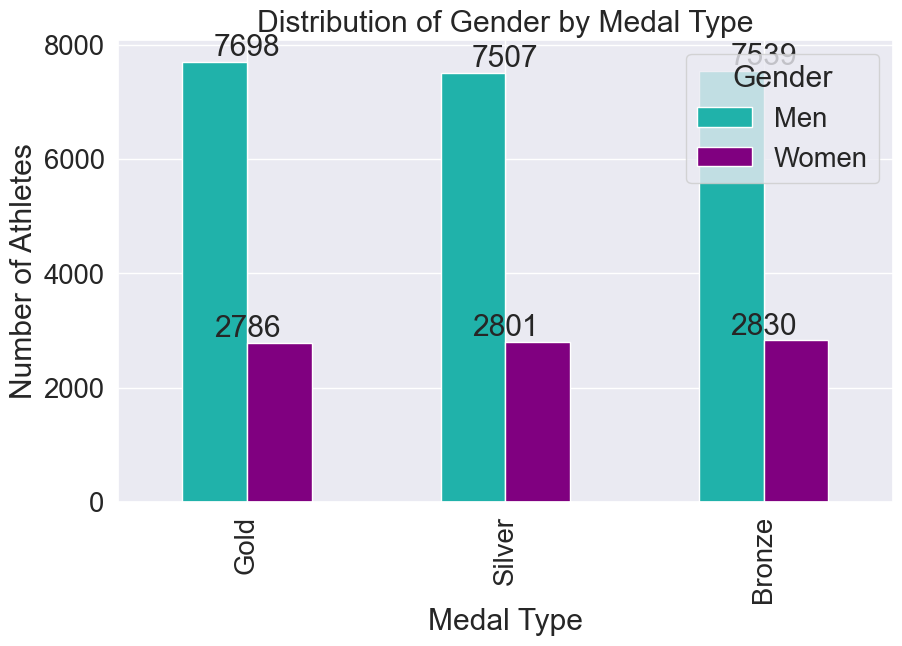

In [292]:
#Number of Gold Medals by Gender
gender_counts = pd.DataFrame({
    'Gold': gender_gold_counts,
    'Silver': gender_silver_counts,
    'Bronze': gender_bronze_counts
}).fillna(0)

gender_counts.T.plot(kind='bar', stacked=False, color=['LightSeaGreen', 'purple'], figsize=(10, 6))

for i, col in enumerate(gender_counts.columns):
    for j, value in enumerate(gender_counts[col]):
        plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Distribution of Gender by Medal Type')
plt.xlabel('Medal Type')
plt.ylabel('Number of Athletes')
plt.legend(title='Gender')
plt.show()

###### Turkey Data analysis and visualization

In [293]:
turkey_data = df[df['Country'] == 'TUR']
turkey_data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Gender_Encoded
7177,1936,Berlin,Wrestling,Wrestling Free.,"KIREÇÇI, Ahmet",TUR,Men,72 - 79KG (Middleweight),0,0
7190,1936,Berlin,Wrestling,Wrestling Gre-R,"ERKAN, Yasar",TUR,Men,56 - 61KG (Featherweight),2,0
7418,1948,London,Athletics,Athletics,"SARIALP, Ruhi",TUR,Men,Triple Jump,0,0
7972,1948,London,Wrestling,Wrestling Free.,"BALAMIR, Halit",TUR,Men,- 52KG (Flyweight),1,0
7977,1948,London,Wrestling,Wrestling Free.,"AKAR, Nazuh",TUR,Men,52 - 57KG (Bantamweight),2,0
...,...,...,...,...,...,...,...,...,...,...
29205,2008,Beijing,Wrestling,Wrestling Gre-R,"AVLUCA, Nazmi",TUR,Men,74 - 84KG,0,0
29604,2012,London,Athletics,Athletics,"BULUT, Gamze",TUR,Women,1500M,1,1
30923,2012,London,Taekwondo,Taekwondo,"TATAR, Nur",TUR,Women,57 - 67 KG,1,1
30926,2012,London,Taekwondo,Taekwondo,"TAZEGUL, Servet",TUR,Men,58 - 68 KG,2,0


In [294]:
gender_counts = turkey_data['Gender'].value_counts()
print("Number of female athletes:", gender_counts['Women'])
print("Number of male athletes:", gender_counts['Men'])

Number of female athletes: 9
Number of male athletes: 77


In [295]:
medal_type = turkey_data['Medal'].value_counts()

print("Number of athletes winning gold:", medal_type[2])
print("Number of athletes winning silver:", medal_type[1])
print("Number of athletes winning bronze:", medal_type[0])

Number of athletes winning gold: 38
Number of athletes winning silver: 25
Number of athletes winning bronze: 23


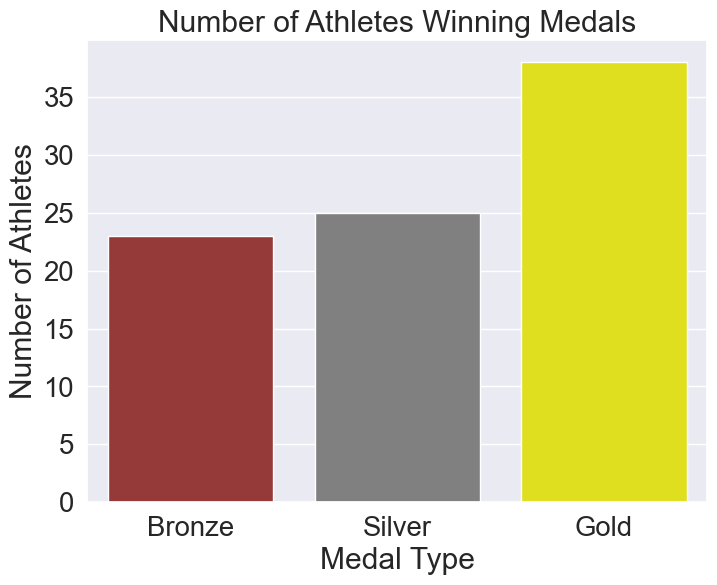

In [296]:
plt.figure(figsize=(8, 6))
sns.barplot(x=medal_type.index, y=medal_type.values, palette={2: "yellow", 1: "grey", 0: "brown"})

plt.title('Number of Athletes Winning Medals')
plt.xlabel('Medal Type')
plt.ylabel('Number of Athletes')

plt.xticks(range(3), ['Bronze', 'Silver', 'Gold'])
plt.show()


In [297]:
sport_type = turkey_data['Sport'].value_counts()
most_common_sport = sport_type.idxmax()
count = sport_type.max()

print("The sport with the most athletes:", most_common_sport)
print("Number of athletes:", count)

The sport with the most athletes: Wrestling
Number of athletes: 58


In [298]:
athlete_name = turkey_data['Athlete'].value_counts()
best_athlete = athlete_name.idxmax()
count = athlete_name.max()
print("The athlete who won the most medals:", best_athlete)
print("Number of medals:", count)

The athlete who won the most medals: SULEYMANOGLU, Naim
Number of medals: 3


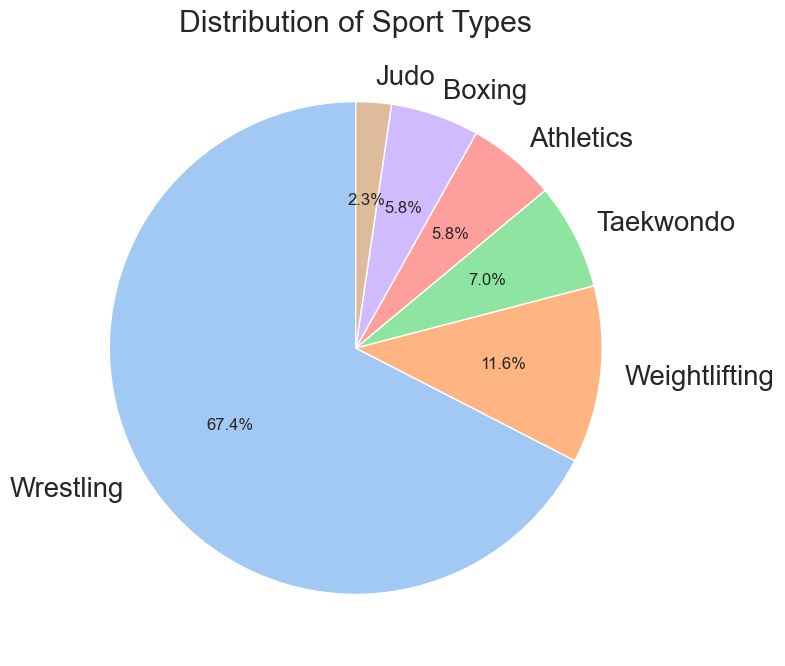

In [299]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 12
custom_colors = sns.color_palette('pastel')
sport_type.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Distribution of Sport Types')
plt.ylabel('')
plt.show()

In [300]:
sport_type

Sport
Wrestling        58
Weightlifting    10
Taekwondo         6
Athletics         5
Boxing            5
Judo              2
Name: count, dtype: int64

### Encoding

In [301]:
df['Country'] = label_encoder.fit_transform(df['Country'])
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_countries = one_hot_encoder.fit_transform(df[['Country']])
df_encoded = pd.concat([df, pd.DataFrame(encoded_countries, columns=['Country_'+str(int(i)) for i in range(encoded_countries.shape[1])])], axis=1)

C:\Users\CASPER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [302]:
label_encoder = LabelEncoder()
df['Sport_Encoded']= label_encoder.fit_transform(df['Sport'])
df['Event_Encoded']= label_encoder.fit_transform(df['Event'])
df['Discipline_Encoded']= label_encoder.fit_transform(df['Discipline'])

In [303]:
df['Gold_Medal'] = (df_encoded['Medal'] == 2).astype(int)

In [304]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Gender_Encoded,Sport_Encoded,Event_Encoded,Discipline_Encoded,Gold_Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",58,Men,100M Freestyle,2,0,0,78,49,1
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",7,Men,100M Freestyle,1,0,0,78,49,0
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",52,Men,100M Freestyle For Sailors,0,0,0,79,49,0
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",52,Men,100M Freestyle For Sailors,2,0,0,79,49,1
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",52,Men,100M Freestyle For Sailors,1,0,0,79,49,0


In [305]:
numeric_columns = df.select_dtypes(include=['int32', 'int64']).columns
numeric_df = df[numeric_columns]
correlation_matrix = numeric_df.corr()
numeric_df.corr()

,Year,Country,Medal,Gender_Encoded,Sport_Encoded,Event_Encoded,Discipline_Encoded,Gold_Medal
Year,1.000000,-0.067446,-0.037375,0.341617,-0.048590,0.007409,0.052209,-0.026117
Country,-0.067446,1.000000,0.095475,-0.010952,-0.044880,-0.054244,-0.034941,0.105103
Medal,-0.037375,0.095475,1.000000,-0.006632,0.000256,0.014454,0.001170,0.867241
Gender_Encoded,0.341617,-0.010952,-0.006632,1.000000,-0.090278,-0.003948,-0.007601,-0.007016
Sport_Encoded,-0.048590,-0.044880,0.000256,-0.090278,1.000000,0.166718,0.554357,-0.000105
Event_Encoded,0.007409,-0.054244,0.014454,-0.003948,0.166718,1.000000,-0.072689,0.008342
Discipline_Encoded,0.052209,-0.034941,0.001170,-0.007601,0.554357,-0.072689,1.000000,0.000041
Gold_Medal,-0.026117,0.105103,0.867241,-0.007016,-0.000105,0.008342,0.000041,1.000000


In [306]:
X = df[['Year', 'Country','Gender_Encoded', 'Sport_Encoded', 'Event_Encoded', 'Discipline_Encoded']]
y = df['Gold_Medal']  

### Normalize

In [307]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))


### Train and Test Split


In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [309]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24928, 6) (24928,)
Test set: (6233, 6) (6233,)


### KNN

In [310]:
from sklearn.neighbors import KNeighborsClassifier

k=3
neigh = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights= 'distance', algorithm= 'ball_tree')
model= neigh.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Model Score:", score)

Model Score: 0.8214343012995348


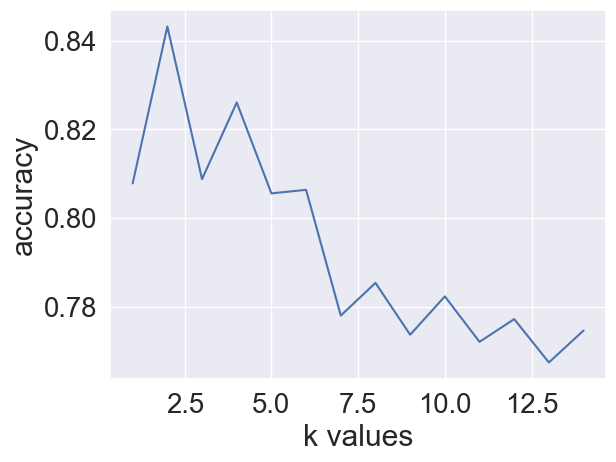

In [311]:
score_list = []
for i in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,15), score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [312]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4192
           1       0.74      0.71      0.72      2041

    accuracy                           0.82      6233
   macro avg       0.80      0.79      0.80      6233
weighted avg       0.82      0.82      0.82      6233



In [313]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
acc_train=accuracy_score(y_train, model.predict(X_train))
acc_test=accuracy_score(y_test, y_pred)
print("Train set acc: ", acc_train)
print("Test set acc: ", acc_test)

Train set acc:  0.96349486521181
Test set acc:  0.8214343012995348


In [314]:
from sklearn.metrics import confusion_matrix
cnf_matrix_knn = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
cnf_matrix_knn = [[tp,fp],[fn,tn]]
cnf_matrix_knn

[[1441, 513], [600, 3679]]

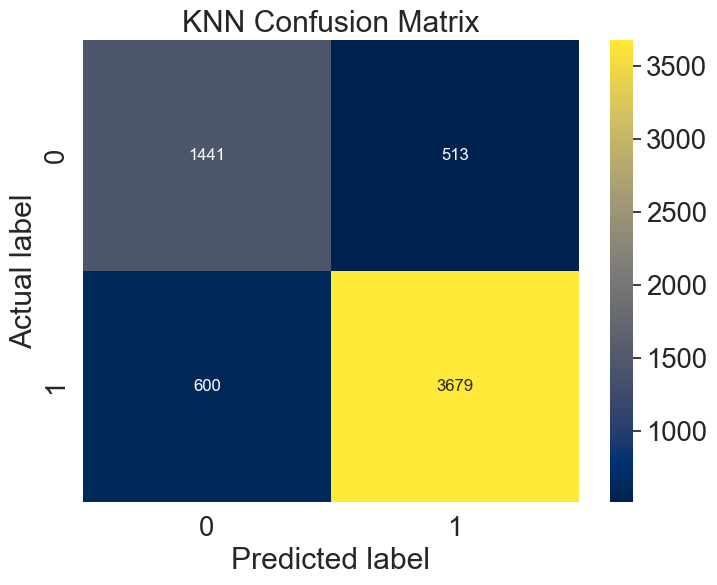

In [315]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True, cmap="cividis", fmt='g')
plt.title('KNN Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Decision Tree Classifier

In [316]:
from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier()
model= tree.fit(X_train, y_train)
score=model.score(X_test, y_test)
print("Model Score:", score)


Model Score: 0.8137333547248516


In [317]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4192
           1       0.72      0.70      0.71      2041

    accuracy                           0.81      6233
   macro avg       0.79      0.78      0.79      6233
weighted avg       0.81      0.81      0.81      6233



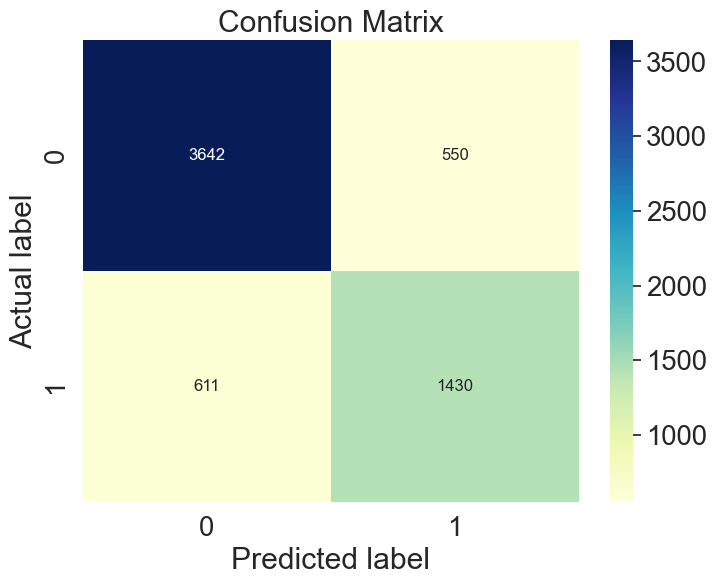

In [318]:
from sklearn import metrics
y_pred = model.predict(X_test)

cnf_matrix_dtc = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

###  Random Forest Classifier

In [327]:
from sklearn.ensemble import RandomForestClassifier

forest= RandomForestClassifier(n_estimators = 50, min_samples_leaf = 1, min_samples_split = 2)
model= forest.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Model Score:", score)


Model Score: 0.8270495748435746


In [328]:
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4192
           1       0.76      0.69      0.72      2041

    accuracy                           0.83      6233
   macro avg       0.81      0.79      0.80      6233
weighted avg       0.82      0.83      0.82      6233



In [330]:
cnf_matrix_rf = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
cnf_matrix_rf = [[tp,fp],[fn,tn]]
cnf_matrix_rf

[[1402, 439], [639, 3753]]

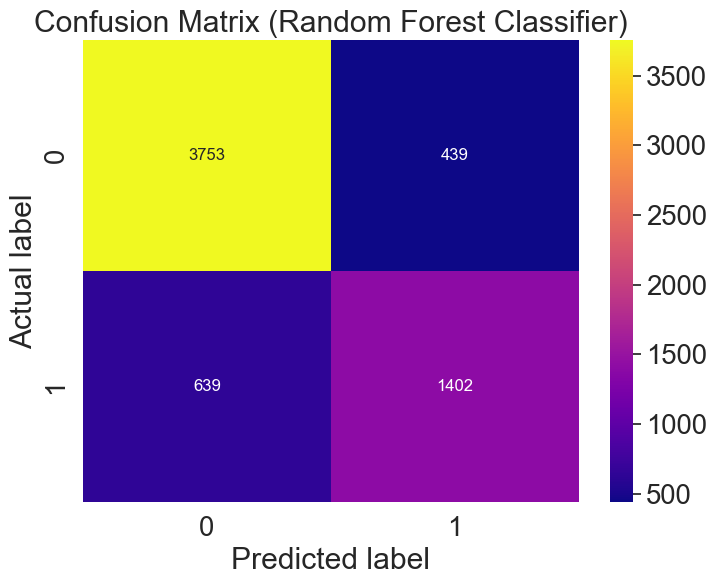

In [331]:
y_pred = model.predict(X_test)
conf_matrix_rf = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap="plasma", fmt='g')
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
conf_matrix = confusion_matrix(y_test, y_pred)



In [326]:
#### burda denedikten sonra parametreleri modele ekleyip yukarıda yeniden eğittim.
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [50,100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Set Accuracy:", test_accuracy)


Best Hyperparameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test Set Accuracy: 0.8283330659393551
